# 제주도 시,읍,면 별 위도 경도 데이터 프레임 생성
- 최종 dts 인덱스

In [1]:
import pandas as pd
import numpy as np
import json
from tqdm import tqdm

jeju_geo = json.load(open('./hangjeongdong_제주특별자치도.geojson', encoding='utf8'))

In [2]:
key=['경도_Lng','위도_Lat','행정구역']
lng_lst=[]
lat_lst=[]
region_lst=[]

for geo in jeju_geo['features']:
    
    if geo['properties']['adm_nm'].find('동')==-1:
        region=geo['properties']['adm_nm']
    else:
        if geo['properties']['adm_nm'].find('제주시')==-1:
            region='제주특별자치도 서귀포시'
        else:
            region='제주특별자치도 제주시'
    
    for i in range(len(geo['geometry']['coordinates'])):
        for lng,lat in geo['geometry']['coordinates'][i][0]:
            region_lst.append(region)
            lng_lst.append(lng)
            lat_lst.append(lat)

In [23]:
jeju_df=pd.DataFrame(dict(zip(key,[lng_lst,lat_lst,region_lst])))
jeju_df.head(2)

,경도_Lng,위도_Lat,행정구역
0,126.231279,33.404747,제주특별자치도 제주시 한림읍
1,126.229939,33.404130,제주특별자치도 제주시 한림읍


In [24]:
jeju_df['경도_Lng']=jeju_df['경도_Lng'].astype(str).str[:7]
jeju_df['위도_Lat']=jeju_df['위도_Lat'].astype(str).str[:6]

jeju_df.head(2)

,경도_Lng,위도_Lat,행정구역
0,126.231,33.404,제주특별자치도 제주시 한림읍
1,126.229,33.404,제주특별자치도 제주시 한림읍


In [25]:
jeju_df.duplicated().sum()

4348

In [26]:
jeju_df=jeju_df.drop_duplicates()
jeju_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5503 entries, 0 to 9848
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   경도_Lng  5503 non-null   object
 1   위도_Lat  5503 non-null   object
 2   행정구역    5503 non-null   object
dtypes: object(3)
memory usage: 172.0+ KB


In [27]:
jeju_df.describe()

,경도_Lng,위도_Lat,행정구역
count,5503,5503,5503
unique,791,476,14
top,126.619,33.358,제주특별자치도 서귀포시
freq,30,53,1025


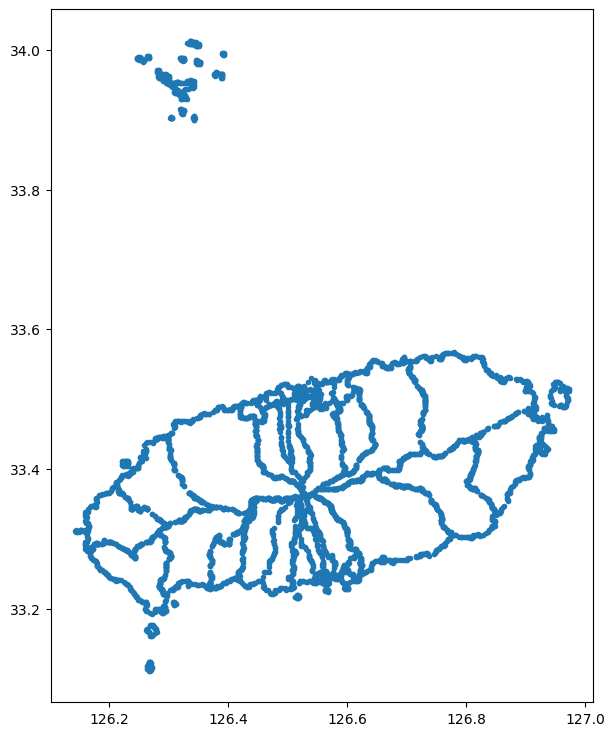

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,9))
plt.plot(jeju_df['경도_Lng'].astype(float),jeju_df['위도_Lat'].astype(float),'o',markersize=3)

In [34]:
key=['경도_Lng-위도_Lat','행정구역']
lng_lat_lst=[]
region_lst=[]

regions=jeju_df['행정구역'].unique()
regions

for region in tqdm(regions):
    lats=np.sort(jeju_df[jeju_df['행정구역']==region]['위도_Lat'].unique())
    for lat in lats:
        min_lng=jeju_df[np.logical_and(jeju_df['행정구역']==region, jeju_df['위도_Lat']==lat)]['경도_Lng'].min()
        max_lng=jeju_df[np.logical_and(jeju_df['행정구역']==region, jeju_df['위도_Lat']==lat)]['경도_Lng'].max()
        lngs=np.arange(float(min_lng),float(max_lng)+.001,.001)
        for lng in lngs:
            lng='{:.3f}'.format(lng)
            lng_lat_lst.append(lng+'_'+lat)
            region_lst.append(region)

100%|██████████| 14/14 [00:08<00:00,  1.68it/s]


In [38]:
df_final=pd.DataFrame(dict(zip(key,[lng_lat_lst,region_lst])))
df_final.head(2)

,경도_Lng-위도_Lat,행정구역
0,126.298_33.319,제주특별자치도 제주시 한림읍
1,126.299_33.319,제주특별자치도 제주시 한림읍


In [46]:
lng_lst_2=[]
lat_lst_2=[]
for lnglat in df_final['경도_Lng-위도_Lat'].str.split('_'):
    lng,lat=lnglat
    lng_lst_2.append(lng)
    lat_lst_2.append(lat)
df_final['경도_Lng']=lng_lst_2
df_final['위도_Lat']=lat_lst_2

In [50]:
df_final=df_final[['경도_Lng-위도_Lat','경도_Lng','위도_Lat','행정구역']]

In [59]:
df_final.duplicated(['경도_Lng-위도_Lat']).sum()

3870

In [64]:
df_final=df_final.drop_duplicates(['경도_Lng-위도_Lat']).reset_index().drop(['index'],axis=1)

In [65]:
df_final.head(2)

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역
0,126.298_33.319,126.298,33.319,제주특별자치도 제주시 한림읍
1,126.299_33.319,126.299,33.319,제주특별자치도 제주시 한림읍


In [66]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97228 entries, 0 to 97227
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   경도_Lng-위도_Lat  97228 non-null  object
 1   경도_Lng         97228 non-null  object
 2   위도_Lat         97228 non-null  object
 3   행정구역           97228 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [67]:
df_final.describe()

,경도_Lng-위도_Lat,경도_Lng,위도_Lat,행정구역
count,97228,97228,97228,97228
unique,97228,831,476,14
top,126.298_33.319,126.518,33.312,제주특별자치도 서귀포시
freq,1,269,695,21954


In [68]:
df_final.to_csv('./lnglat.csv', index=False)